# Глава 9 (Иванов Илья, группа 3530901/70203)

In [1]:
%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd
import scipy.signal

from warnings import simplefilter
simplefilter('ignore', RuntimeWarning)

PI2 = 2 * np.pi
GRAY = '0.7'

## Упражнение 9.1.
The goal of this exercise is to explore the effect of diff and differentiate on a signal. Create a triangle wave and plot it. Apply diff and plot the result. Compute the spectrum of the triangle wave, apply differentiate, and plot the result. Convert the spectrum back to a wave and plot it. Are there differences between the effect of diff and differentiate for this wave?

Создадим треугольную волну:

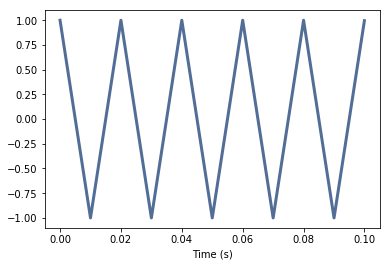

In [2]:
in_wave = thinkdsp.TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

Конечная разность треугольной волны - прямоугольная волна. Это объясняет, почему гармоники прямоугольной волны спадают как $1/f$, в то время как гармоники треугольной волны спадают как $1/f^2$.

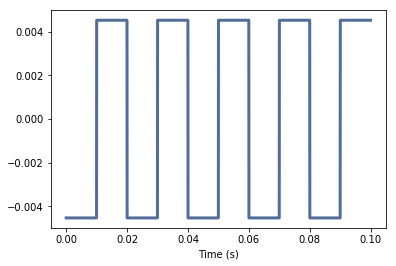

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Если взять производную в частотной области, появится «звон»:

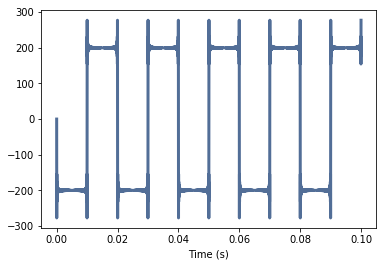

In [4]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Математически говоря, проблема в том, что производная треугольной волны не определена в точках треугольника.

## Упражнение 9.2.
The goal of this exercise is to explore the effect of cumsum and integrate on a signal. Create a square wave and plot it. Apply cumsum and plot the result. Compute the spectrum of the square wave, apply integrate, and plot the result. Convert the spectrum back to a wave and plot it. Are there differences between the effect of cumsum and integrate for this wave?

Создадим прямоугольную волну:

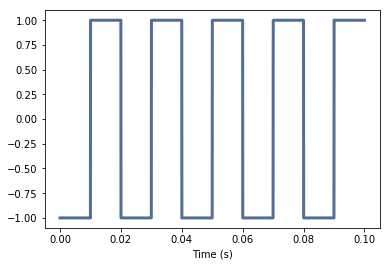

In [5]:
in_wave = thinkdsp.SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

Ожидаемо, нарастающая сумма прямоугольной волны является треугольной волной.

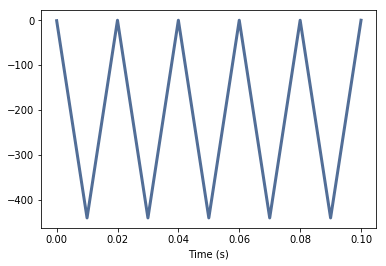

In [6]:
out_wave = in_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

При взятии интеграла в частотной области также получается треугольная волна, но их амплитуды сильно разнятся:

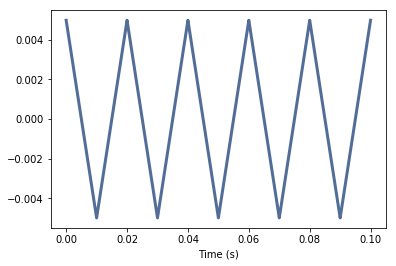

In [7]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Если сдвинуть и нормализовать обе волны, они станут визуально одинаковыми:

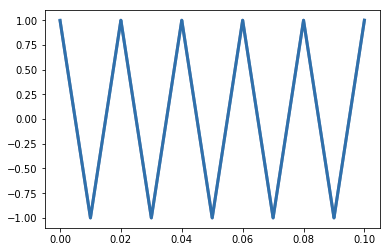

In [8]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

Численно они также близки, с точностью до третьего знака после запятой:

In [9]:
max(abs(out_wave.ys - out_wave2.ys))

0.0045351473922902175

## Упражнение 9.3.
The goal of this exercise is to explore the effect of integrating twice. Create a sawtooth wave, compute its spectrum, then apply integrate twice. Plot the resulting wave and its spectrum. What is the mathematical form of the wave? Why does it resemble a sinusoid?

Создадим пилообразный сигнал:

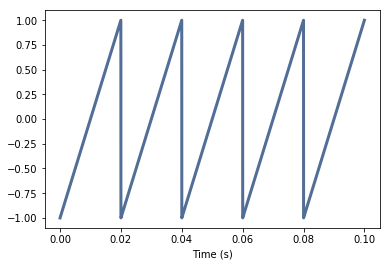

In [10]:
in_wave = thinkdsp.SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

Первая нарастающая сумма пилообразного сигнала - парабола:

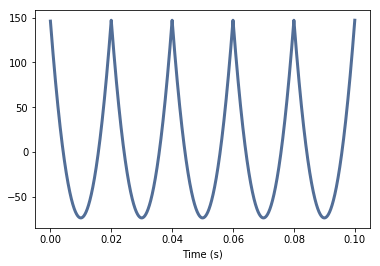

In [11]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Вторая нарастающая сумма представляет из себя кубическую кривую:

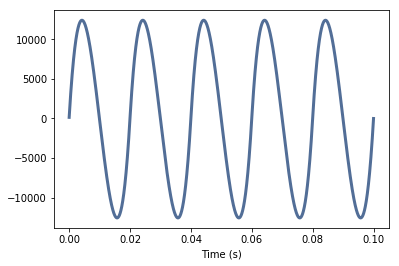

In [12]:
out_wave = out_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Двойное интегрирование также даёт кубическую кривую:

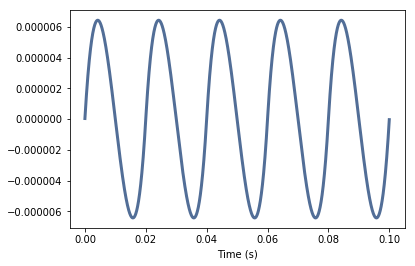

In [13]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Результат все больше и больше напоминает синусоиду. Причина в том, что интегрирование действует как фильтр низких частот. На данный момент мы отфильтровали почти все частоты, кроме основной, в чём можно убедиться, посмотрев на спектр:

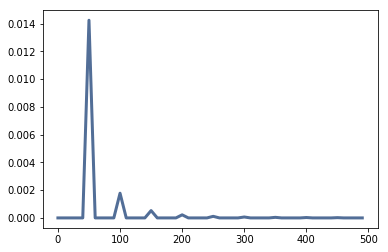

In [14]:
out_wave2.make_spectrum().plot(high=500)

## Упражнение 9.4.
The goal of this exercise is to explore the effect of the 2nd difference and 2nd derivative. Create a CubicSignal, which is defined in thinkdsp. Compute the second difference by applying diff twice. What does the result look like? Compute the second derivative by applying differentiate to the spectrum twice. Does the result look the same? 

Plot the filters that corresponds to the 2nd difference and the 2nd derivative and compare them. Hint: In order to get the filters on the same scale, use a wave with framerate 1.

Создадим `CubicSignal`:

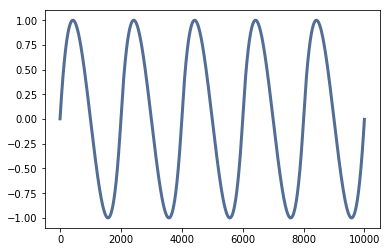

In [15]:
in_wave = thinkdsp.CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Ожидаемо, первая конечная разность - парабола, а вторая - пилообразная волна:

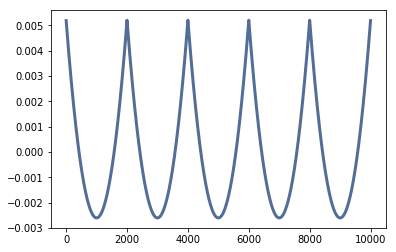

In [16]:
out_wave = in_wave.diff()
out_wave.plot()

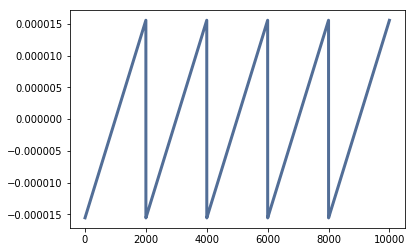

In [17]:
out_wave = out_wave.diff()
out_wave.plot()

При двойном дифференцировании получаем пилообразный сигнал с некоторым "звоном". Опять же, проблема в том, что производная параболического сигнала не определена в некоторых точках:

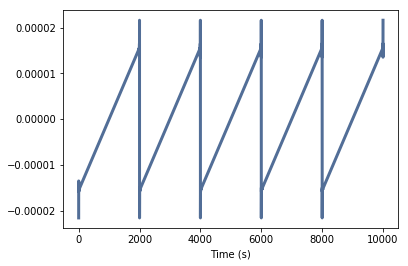

In [18]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Окно второй конечной разности - \[-1, 2, -1\]. Вычисляя ДПФ окна, можно найти соответствующий фильтр:

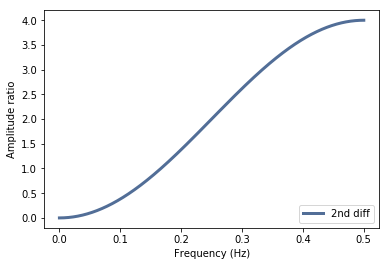

In [19]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = thinkdsp.zero_pad(diff_window, len(in_wave))
diff_wave = thinkdsp.Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude ratio', loc='lower right')

Для второй производной мы можем найти соответствующий фильтр, рассчитав фильтр первой производной и возведя его в квадрат:

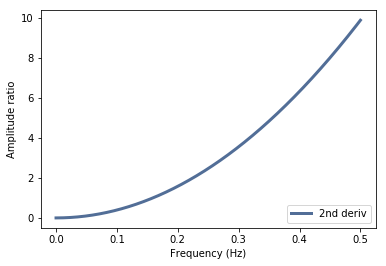

In [20]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude ratio', loc='lower right')

Оба фильтра на одном графике:

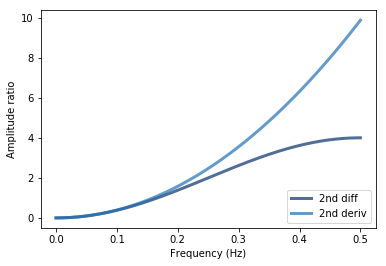

In [21]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude ratio', loc='lower right')

Оба фильтра являются фильтрами высоких частот, которые усиливают самые высокие частотные составляющие. Вторая конечная разность на низких частотах не сильно отличается от второй производной, но на высоких частотах существенно отклоняется.